Code for development of fitting linear regression models to Keller/Zlatic VNC data

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import pickle

from janelia_core.stats.regression import grouped_linear_regression_boot_strap
from janelia_core.stats.regression import visualize_boot_strap_results

from keller_zlatic_vnc.linear_modeling import one_hot_from_table
from keller_zlatic_vnc.linear_modeling import color_grp_vars

## Parameters for here

In [28]:
data_dir = r'/Users/williambishop/Desktop'
data_file = 'A00c_activity.pkl'

include_mean = True
beh_before = ['Q', 'F', 'B']
beh_after = ['Q', 'F', 'B']
enc_subjects = False

## Load data

In [29]:
data_path = Path(data_dir) / data_file

with open(data_path, 'rb') as f:
    data = pickle.load(f)
    
data = pd.DataFrame(data)

## Produce one-hot encoding of the data

In [22]:
enc_data, enc_vars = one_hot_from_table(data, beh_before=beh_before, beh_after=beh_after,
                                        enc_subjects=enc_subjects) 
if include_mean:
    enc_vars.append('mean')

## Run regression analysis

In [23]:
y = data['dff_after']

In [24]:
unique_ids = data['subject_id'].unique()
g = np.zeros(len(data))
for u_i, u_id in enumerate(unique_ids):
    g[data['subject_id'] == u_id] = u_i

In [25]:
bs_results = grouped_linear_regression_boot_strap(x=enc_data, y=y, g=g, n_bs_smps=1000, 
                                           include_mean=include_mean)

## Visualize the results

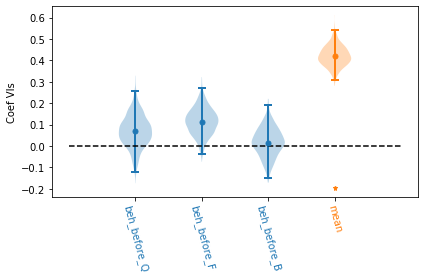

In [27]:
font_size = 10

ax = visualize_boot_strap_results(bs_values=bs_results[0], 
                                   var_strs=enc_vars, 
                                  theta = bs_results[1],
                                  var_clrs=color_grp_vars(enc_vars),
                                  violin_plots=True,
                                  alpha=.01)

ph = plt.ylabel('Coef Vls', fontsize=font_size)
ax.tick_params(axis="x", labelsize=font_size)
ax.tick_params(axis="y", labelsize=font_size)
plt.tight_layout()

#plt.savefig('/Users/williambishop/Desktop/test.png', dpi=1000)

In [16]:
fig.bbox